# Stock Traiding Agent

From: https://github.com/AminHP/gym-anytrading.

For baselines, check: https://github.com/hill-a/stable-baselines.

In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext blackcellmagic
%matplotlib inline

In [11]:
import gym

import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

from relearn.env import StockTrading

In [3]:
df = pd.read_csv('./data/GOOGL.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


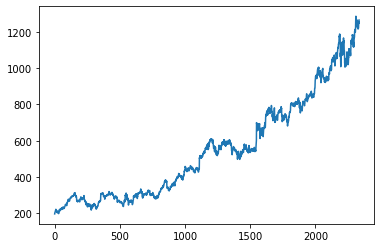

In [4]:
df['Close'].plot()

In [7]:
env = StockTrading(df, window_size=10, frame_bound=(10, 300))

/home/jumin/miniconda3/envs/relearn/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

env information:
> shape: (10, 2)
> df.shape: (2335, 7)
> prices.shape: (300,)
> signal_features.shape: (300, 2)
> max_possible_profit: 5.19197248193094


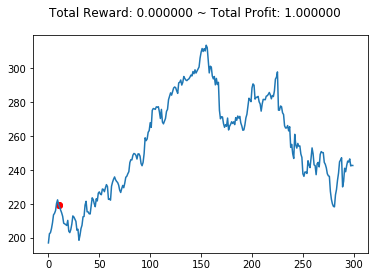

In [9]:
env.reset()
# Short and Long positions are shown in red and green colors
env.render()

info: {'total_reward': 20.900887999999867, 'total_profit': 0.3756177667075649, 'position': 0}


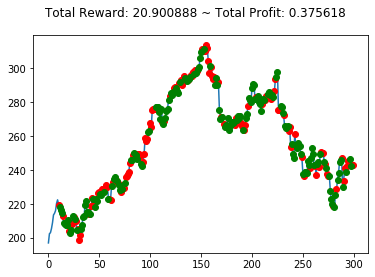

In [12]:
observation = env.reset()
while True:
    # Random action
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [13]:
# The algorithms require a vectorized environment to run
vecenv = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, vecenv, verbose=1)
model.learn(total_timesteps=20000)





Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


--------------------------------------
| approxkl           | 0.0010518368  |
| clipfrac           | 0.0           |
| explained_variance | -0.000573     |
| fps                | 406           |
| n_updates          | 1             |
| policy_entropy     | 0.69217944    |
| policy_loss        | -0.0027307677 |
| serial_timesteps   | 128           |
| time_elapsed       | 2.38e-06      |
| total_timesteps    | 128           |
| value_loss         | 14.350899     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000110591376 |
| clipfrac           | 0.0            |
| explained_variance | -0.000672      |
| fps                | 2100           |
| n_updates          | 2              |
| policy_entropy     | 0.68880945     |
| policy_loss        | 0.0004021204   |
| serial_t

--------------------------------------
| approxkl           | 0.00030785054 |
| clipfrac           | 0.0           |
| explained_variance | -0.00114      |
| fps                | 1612          |
| n_updates          | 13            |
| policy_entropy     | 0.69249606    |
| policy_loss        | 0.0011874818  |
| serial_timesteps   | 1664          |
| time_elapsed       | 1.05          |
| total_timesteps    | 1664          |
| value_loss         | 26.361782     |
--------------------------------------
---------------------------------------
| approxkl           | 3.4488243e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00225        |
| fps                | 1630           |
| n_updates          | 14             |
| policy_entropy     | 0.69299436     |
| policy_loss        | -0.00039870688 |
| serial_timesteps   | 1792           |
| time_elapsed       | 1.13           |
| total_timesteps    | 1792           |
| value_loss         | 22.021639      |
-------------

--------------------------------------
| approxkl           | 3.9813067e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00258       |
| fps                | 2242          |
| n_updates          | 29            |
| policy_entropy     | 0.68993324    |
| policy_loss        | 9.930227e-08  |
| serial_timesteps   | 3712          |
| time_elapsed       | 2.14          |
| total_timesteps    | 3712          |
| value_loss         | 32.890835     |
--------------------------------------
---------------------------------------
| approxkl           | 8.706195e-06   |
| clipfrac           | 0.0            |
| explained_variance | 2.74e-05       |
| fps                | 2193           |
| n_updates          | 30             |
| policy_entropy     | 0.68912596     |
| policy_loss        | -5.8575766e-05 |
| serial_timesteps   | 3840           |
| time_elapsed       | 2.2            |
| total_timesteps    | 3840           |
| value_loss         | 27.283125      |
-------------

---------------------------------------
| approxkl           | 3.973304e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000843      |
| fps                | 2131           |
| n_updates          | 46             |
| policy_entropy     | 0.515373       |
| policy_loss        | -0.00010450557 |
| serial_timesteps   | 5888           |
| time_elapsed       | 3.13           |
| total_timesteps    | 5888           |
| value_loss         | 36.200436      |
---------------------------------------
-------------------------------------
| approxkl           | 6.003936e-06 |
| clipfrac           | 0.0          |
| explained_variance | -5.21e-05    |
| fps                | 2245         |
| n_updates          | 47           |
| policy_entropy     | 0.52040225   |
| policy_loss        | 0.0003528266 |
| serial_timesteps   | 6016         |
| time_elapsed       | 3.19         |
| total_timesteps    | 6016         |
| value_loss         | 94.61983     |
------------------------

---------------------------------------
| approxkl           | 4.13113e-05    |
| clipfrac           | 0.0            |
| explained_variance | -3.34e-06      |
| fps                | 1544           |
| n_updates          | 63             |
| policy_entropy     | 0.58955604     |
| policy_loss        | -0.00021462957 |
| serial_timesteps   | 8064           |
| time_elapsed       | 4.23           |
| total_timesteps    | 8064           |
| value_loss         | 39.828045      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00012202846 |
| clipfrac           | 0.0           |
| explained_variance | -0.000103     |
| fps                | 1694          |
| n_updates          | 64            |
| policy_entropy     | 0.5983876     |
| policy_loss        | -0.0005035383 |
| serial_timesteps   | 8192          |
| time_elapsed       | 4.31          |
| total_timesteps    | 8192          |
| value_loss         | 42.550873     |
------------

--------------------------------------
| approxkl           | 0.00021591397 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 1539          |
| n_updates          | 80            |
| policy_entropy     | 0.58982223    |
| policy_loss        | -0.0007401699 |
| serial_timesteps   | 10240         |
| time_elapsed       | 6.23          |
| total_timesteps    | 10240         |
| value_loss         | 70.12889      |
--------------------------------------
---------------------------------------
| approxkl           | 9.379418e-05   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 1908           |
| n_updates          | 81             |
| policy_entropy     | 0.57821155     |
| policy_loss        | -0.00026879297 |
| serial_timesteps   | 10368          |
| time_elapsed       | 6.31           |
| total_timesteps    | 10368          |
| value_loss         | 76.55668       |
-------------

-------------------------------------
| approxkl           | 8.376319e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 2188         |
| n_updates          | 97           |
| policy_entropy     | 0.3830094    |
| policy_loss        | -0.000661768 |
| serial_timesteps   | 12416        |
| time_elapsed       | 7.38         |
| total_timesteps    | 12416        |
| value_loss         | 83.6647      |
-------------------------------------
--------------------------------------
| approxkl           | 4.286329e-06  |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 2356          |
| n_updates          | 98            |
| policy_entropy     | 0.37674475    |
| policy_loss        | 0.00017582742 |
| serial_timesteps   | 12544         |
| time_elapsed       | 7.44          |
| total_timesteps    | 12544         |
| value_loss         | 75.216194     |
--------------------------------------

---------------------------------------
| approxkl           | 5.3014883e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 1017           |
| n_updates          | 114            |
| policy_entropy     | 0.43744645     |
| policy_loss        | -0.00021972891 |
| serial_timesteps   | 14592          |
| time_elapsed       | 9              |
| total_timesteps    | 14592          |
| value_loss         | 48.190228      |
---------------------------------------
--------------------------------------
| approxkl           | 1.9756249e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 1260          |
| n_updates          | 115           |
| policy_entropy     | 0.44137514    |
| policy_loss        | 7.0653856e-05 |
| serial_timesteps   | 14720         |
| time_elapsed       | 9.12          |
| total_timesteps    | 14720         |
| value_loss         | 89.9019       |
------------

--------------------------------------
| approxkl           | 0.00013551058 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 2451          |
| n_updates          | 131           |
| policy_entropy     | 0.359929      |
| policy_loss        | 0.00029645622 |
| serial_timesteps   | 16768         |
| time_elapsed       | 10.3          |
| total_timesteps    | 16768         |
| value_loss         | 32.95417      |
--------------------------------------
--------------------------------------
| approxkl           | 2.4035335e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 1673          |
| n_updates          | 132           |
| policy_entropy     | 0.3458689     |
| policy_loss        | 0.00013432885 |
| serial_timesteps   | 16896         |
| time_elapsed       | 10.4          |
| total_timesteps    | 16896         |
| value_loss         | 113.480644    |
-------------------------

--------------------------------------
| approxkl           | 4.7660145e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 2355          |
| n_updates          | 148           |
| policy_entropy     | 0.32111642    |
| policy_loss        | -0.0013007331 |
| serial_timesteps   | 18944         |
| time_elapsed       | 11.4          |
| total_timesteps    | 18944         |
| value_loss         | 54.26505      |
--------------------------------------
--------------------------------------
| approxkl           | 9.698533e-07  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 2289          |
| n_updates          | 149           |
| policy_entropy     | 0.32868022    |
| policy_loss        | 0.00022956764 |
| serial_timesteps   | 19072         |
| time_elapsed       | 11.5          |
| total_timesteps    | 19072         |
| value_loss         | 81.73946      |
-------------------------

info: {'total_reward': 38.928937000000246, 'total_profit': 0.7627316604048583, 'position': 1}


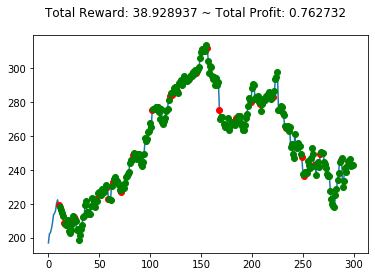

In [18]:
observation = env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [19]:
env.close()